Paso 1: Cargar los Datos

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r'C:\Users\alvar\Downloads\creditcardmarketing.xlsx')
df.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [12]:
df.shape

(18000, 17)

Paso 2: Descripción Estadística de las Variables Numéricas

In [4]:
# Descripción estadística de las variables numéricas
numeric_description = df.describe()

numeric_description

,Customer Number,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


Bank Accounts Open:
La mayoría de los clientes tienen una sola cuenta bancaria abierta. El valor máximo es 3.

Credit Cards Held:
La mayoría de los clientes poseen entre 1 y 2 tarjetas de crédito, con un máximo de 4.

Homes Owned:
La mayoría de los clientes poseen 1 casa, con un máximo de 3 casas.

Household Size:
El tamaño del hogar varía de 1 a 9 personas, con una media de aproximadamente 3.5.

Average Balance:
Los balances promedio de las cuentas varían considerablemente, con una media de aproximadamente 940.52.

Q1 Balance:
Los balances del primer trimestre también varían ampliamente, con una media de aproximadamente 910.45.

Q2 Balance:
Los balances del segundo trimestre muestran una media cercana a 1,000.

Q3 Balance:
Los balances del tercer trimestre tienen una media de aproximadamente 1,042.

Q4 Balance:
Los balances del cuarto trimestre muestran una media más baja en comparación con los otros trimestres, aproximadamente 810.19.

Resumen
La mayoría de las variables numéricas están centradas y dispersas de manera uniforme, aunque hay algunas con una variabilidad más alta (por ejemplo, los balances trimestrales).

Paso 3: Verificación de Valores Nulos

In [5]:
# Verificación de valores nulos
missing_values = df.isnull().sum()

missing_values

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

Consideraciones para Elegir Rellenar con la Media

Pequeño Porcentaje de Valores Nulos:
Hay sólo 24 filas con valores nulos en un conjunto de datos de 18,000 filas. Esto representa aproximadamente el 0.13% de los datos. El impacto de eliminar estas filas es mínimo, pero aún así es una pérdida de información que podemos evitar.

Importancia de la Información Financiera:
Los balances (Average Balance, Q1 Balance, Q2 Balance, Q3 Balance, Q4 Balance) son información financiera importante. Rellenar con la media permite mantener todas las filas de datos, preservando la información de otros atributos para esos clientes.

Mantenimiento de la Consistencia:
Rellenar los valores nulos con la media mantiene la consistencia en la distribución de los datos. La media es una medida central y, aunque no introduce variabilidad adicional, mantiene la tendencia general del conjunto de datos.

Impacto en el Modelado:
En modelos de clasificación, la eliminación de filas puede tener un impacto negativo si esas filas contienen información valiosa. Rellenar con la media permite al modelo utilizar toda la información disponible, lo que puede mejorar la precisión y la robustez del modelo.

Evitación de Pérdida de Datos:
Eliminar filas completas podría afectar la integridad del análisis si esas filas tienen otros atributos significativos que podrían contribuir a la comprensión del comportamiento del cliente.

In [6]:
# Rellenar valores nulos con la media de cada columna
df['Average Balance'].fillna(df['Average Balance'].mean(), inplace=True)
df['Q1 Balance'].fillna(df['Q1 Balance'].mean(), inplace=True)
df['Q2 Balance'].fillna(df['Q2 Balance'].mean(), inplace=True)
df['Q3 Balance'].fillna(df['Q3 Balance'].mean(), inplace=True)
df['Q4 Balance'].fillna(df['Q4 Balance'].mean(), inplace=True)

# Verificación de valores nulos nuevamente
missing_values_after = df.isnull().sum()

missing_values_after

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1040\3394738618.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Average Balance'].fillna(df['Average Balance'].mean(), inplace=True)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1040\3394738618.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

Customer Number         0
Offer Accepted          0
Reward                  0
Mailer Type             0
Income Level            0
# Bank Accounts Open    0
Overdraft Protection    0
Credit Rating           0
# Credit Cards Held     0
# Homes Owned           0
Household Size          0
Own Your Home           0
Average Balance         0
Q1 Balance              0
Q2 Balance              0
Q3 Balance              0
Q4 Balance              0
dtype: int64

In [7]:
# Búsqueda registros duplicados
df.duplicated().sum()

0

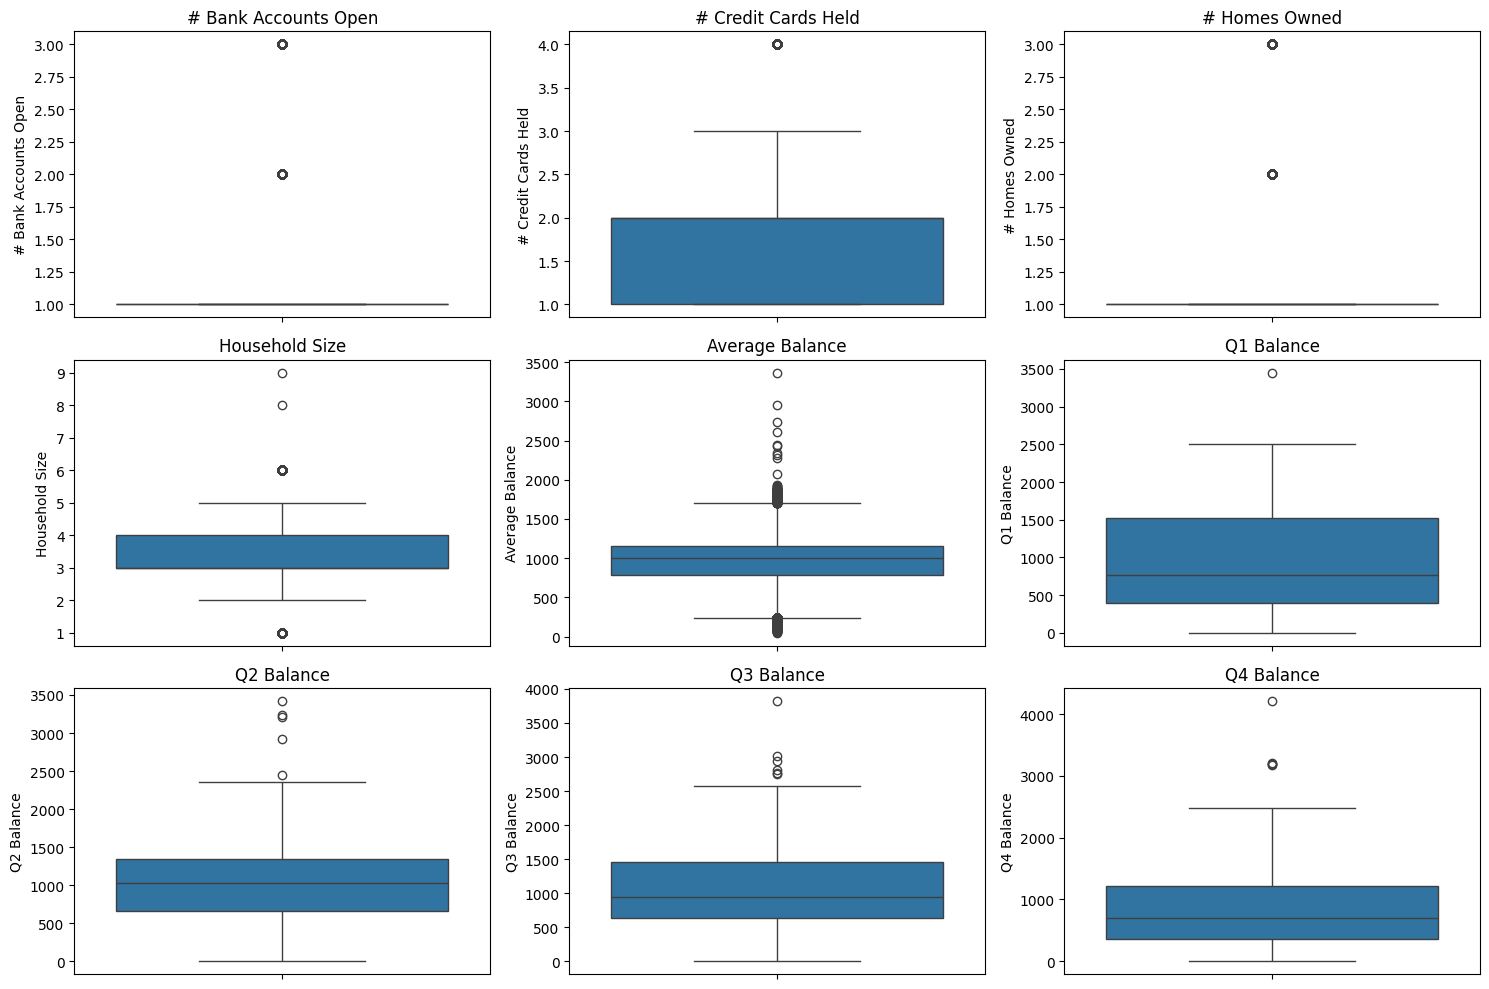

In [10]:
# Visualización de outliers usando boxplots
numeric_columns = ['# Bank Accounts Open', '# Credit Cards Held', '# Homes Owned', 
                   'Household Size', 'Average Balance', 'Q1 Balance', 'Q2 Balance', 
                   'Q3 Balance', 'Q4 Balance']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


Conclusiones
Bank Accounts Open, Credit Cards Held y Homes Owned: Estas columnas tienen pocos outliers, y estos son fácilmente identificables.
Household Size: Esta columna tiene varios outliers significativos en ambos extremos.
Average Balance y Q1, Q2, Q3, Q4 Balance: Estas columnas tienen múltiples outliers, especialmente en el lado superior, indicando que algunos clientes tienen saldos 

In [18]:
# Identificación de outliers usando el método IQR
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Crear un DataFrame para almacenar los outliers
outliers = pd.DataFrame()

for column in numeric_columns:
    outliers[column + '_low'] = df[column] < lower_bound[column]
    outliers[column + '_high'] = df[column] > upper_bound[column]

# Filtrar filas que tienen al menos un outlier
outliers_df = df[outliers.any(axis=1)]

# Mostrar la cantidad de outliers por columna numérica
outliers_count = outliers_df[numeric_columns].apply(lambda x: ((x < lower_bound[x.name]) | (x > upper_bound[x.name])).sum())

outliers_count


# Bank Accounts Open    4308
# Credit Cards Held      515
# Homes Owned           3477
Household Size          1079
Average Balance         1471
Q1 Balance                 1
Q2 Balance                 5
Q3 Balance                 6
Q4 Balance                 5
dtype: int64

In [19]:
# Eliminar los outliers del DataFrame
df_no_outliers = df[~((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)]

In [21]:
df.shape

(18000, 17)

In [22]:
df_no_outliers.shape

(9314, 17)

Decido continuar con el dataframe con los outliers para la generacion del modelo

Paso 4: Distribución de las Variables Categóricas

In [23]:
# Distribución de las variables categóricas
categorical_distribution = df.describe(include=['object'])

categorical_distribution

,Offer Accepted,Reward,Mailer Type,Income Level,Overdraft Protection,Credit Rating,Own Your Home
count,18000,18000,18000,18000,18000,18000,18000
unique,2,3,2,3,2,3,2
top,No,Air Miles,Postcard,Medium,No,High,Yes
freq,16977,6061,9147,9013,15322,6071,11655


Resumen
Desequilibrio en la Variable Objetivo: La mayoría de los clientes no aceptaron la oferta de tarjeta de crédito. Implicación: Los modelos de clasificación pueden tener dificultades para identificar la clase minoritaria (clientes que aceptan la oferta) debido al desequilibrio de clases.
Recompensas: Las recompensas más comunes son las Air Miles.
Tipo de Correo: La mayoría de las ofertas se enviaron como postales.
Nivel de Ingresos: La mayoría de los clientes tienen un nivel de ingresos medio.
Protección contra Sobregiros: La mayoría de los clientes no tienen esta protección.
Calificación Crediticia: La mayoría de los clientes tienen una alta calificación crediticia.
Propiedad de Vivienda: La mayoría de los clientes son propietarios de su vivienda.

Paso 5: Análisis Inicial de las Variables: Gráficos de distribucón de cada variable

<Figure size 1200x800 with 0 Axes>

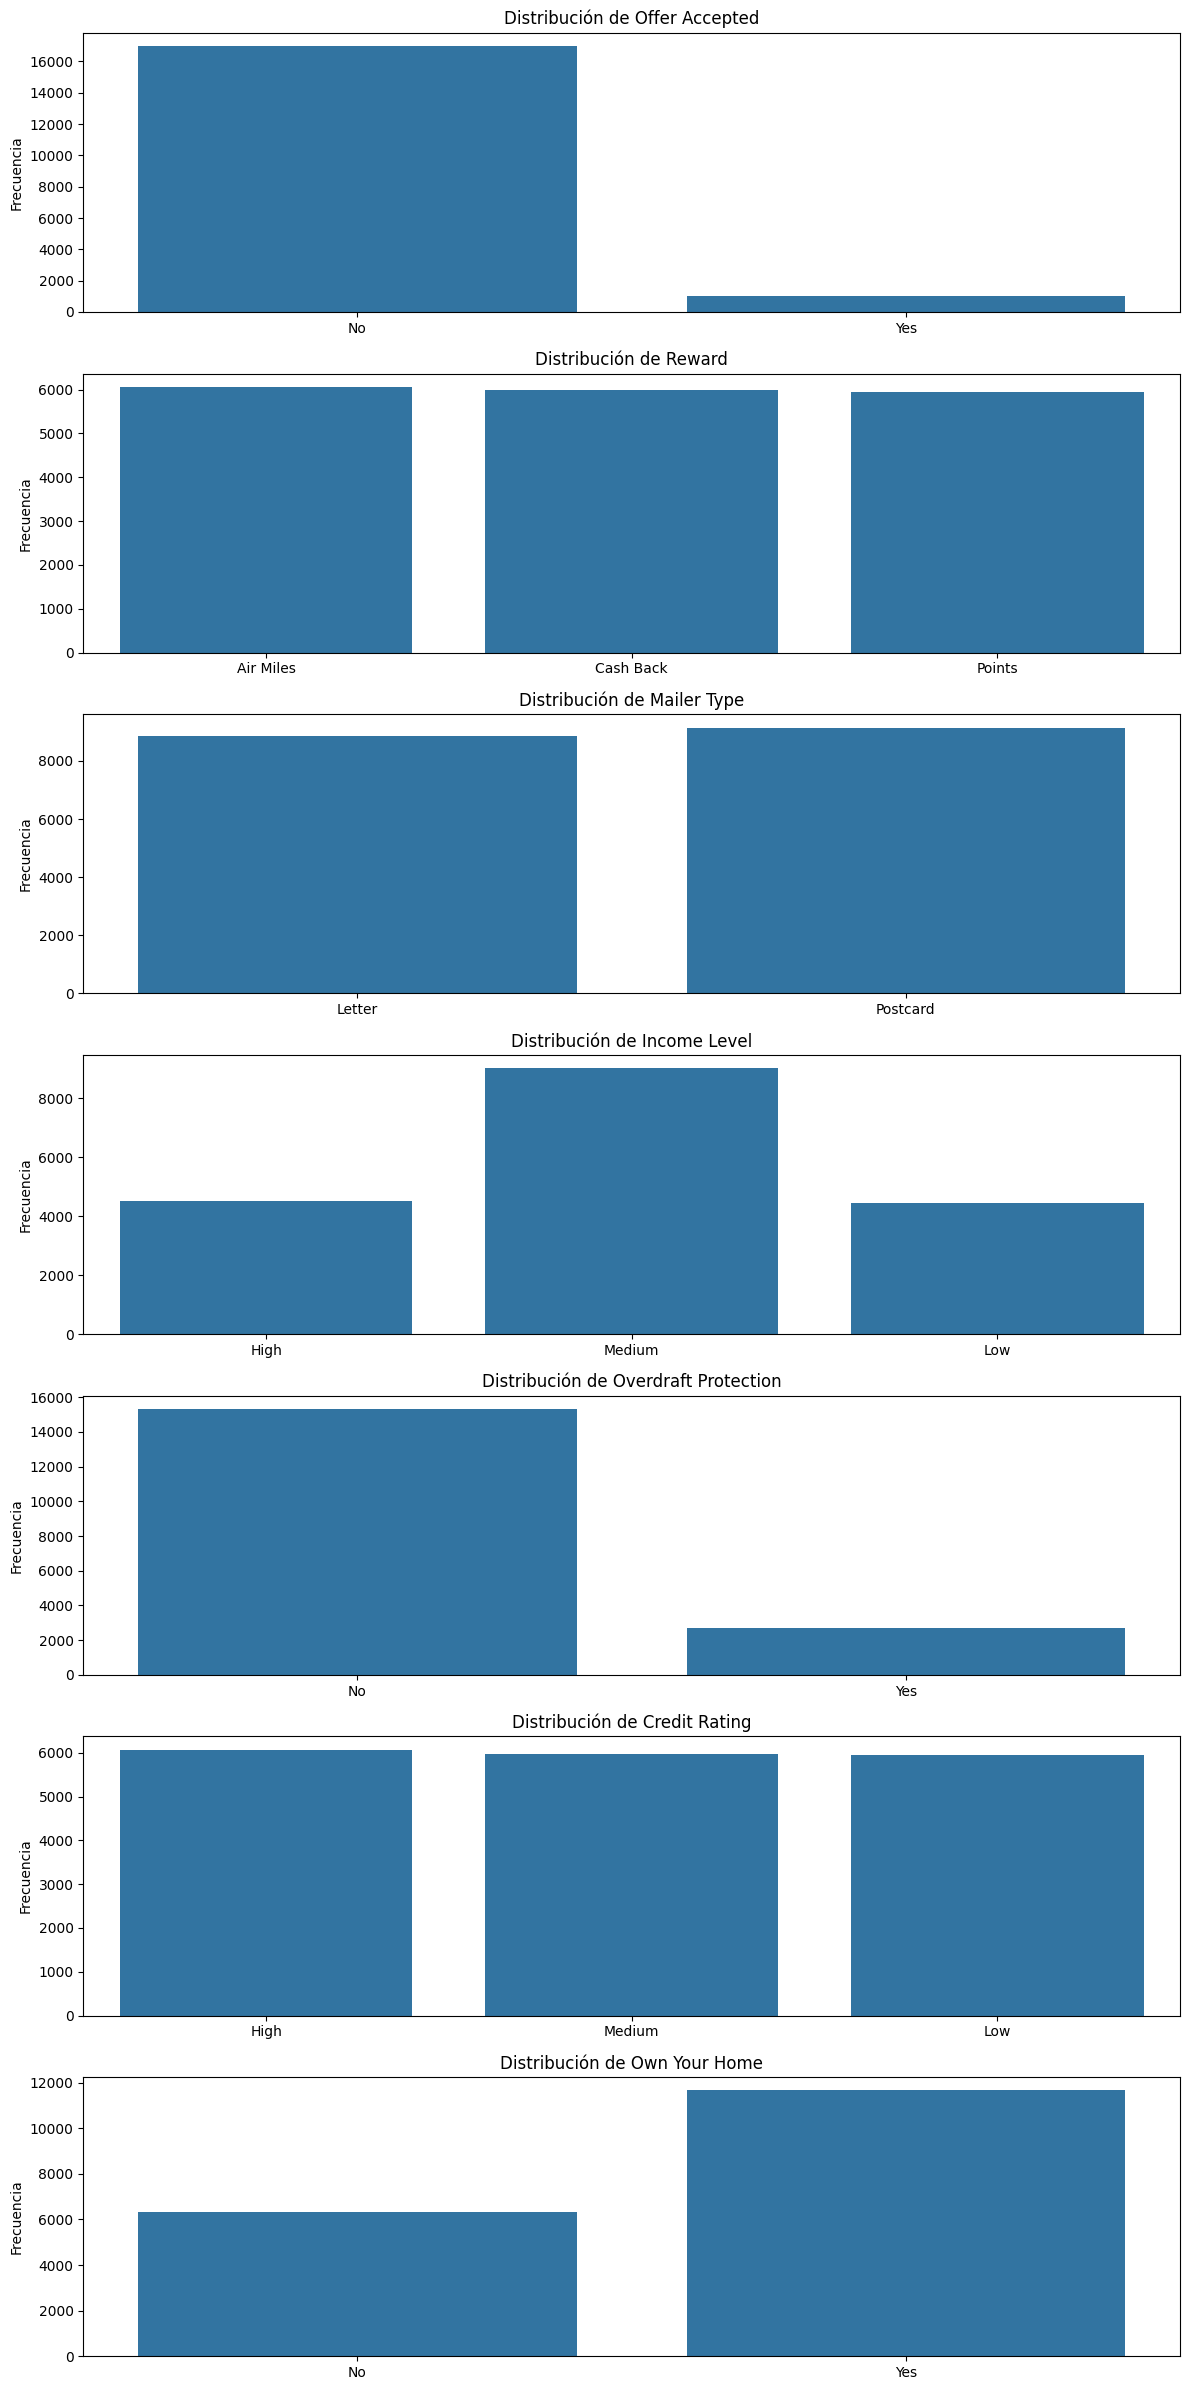

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el tamaño de los gráficos
plt.figure(figsize=(12, 8))

# Variables categóricas
categorical_columns = ['Offer Accepted', 'Reward', 'Mailer Type', 'Income Level', 
                       'Overdraft Protection', 'Credit Rating', 'Own Your Home']

# Crear subplots para cada variable categórica
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(12, 24))

# Visualizar la distribución de cada variable categórica
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Distribución de {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

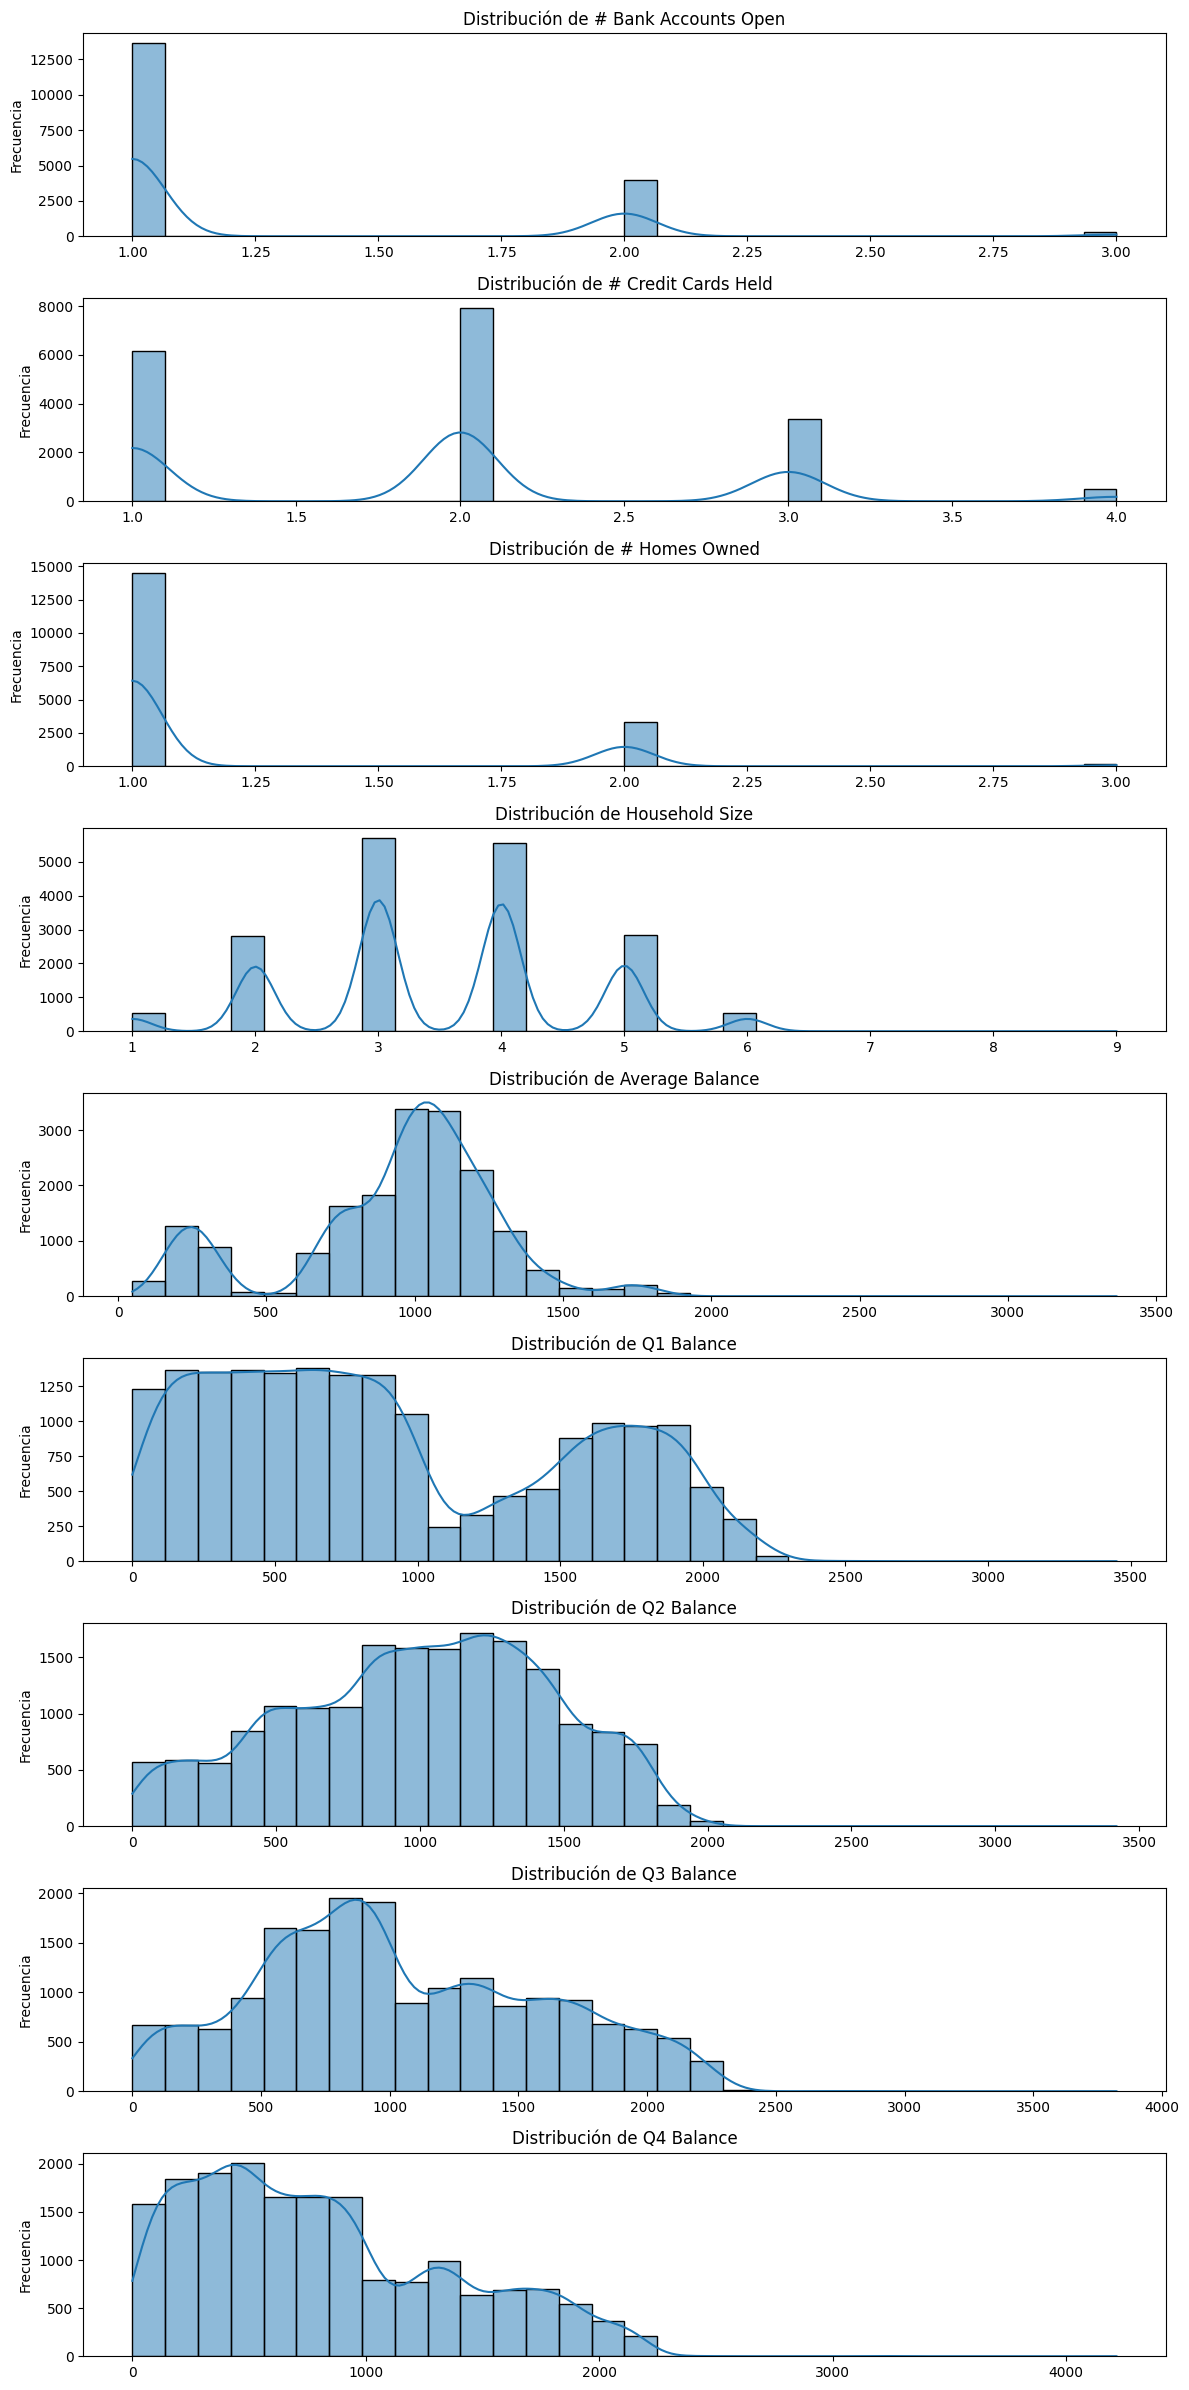

In [25]:
# Variables numéricas
numeric_columns = ['# Bank Accounts Open', '# Credit Cards Held', '# Homes Owned', 
                   'Household Size', 'Average Balance', 'Q1 Balance', 'Q2 Balance', 
                   'Q3 Balance', 'Q4 Balance']

# Crear subplots para cada variable numérica
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(12, 24))

# Visualizar la distribución de cada variable numérica
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Paso 6: Análisis de la Variable Objetivo y su Desequilibrio

In [26]:
# Verificar el desequilibrio de la variable objetivo (Offer Accepted)
offer_accepted_distribution = df['Offer Accepted'].value_counts()

offer_accepted_distribution

Offer Accepted
No     16977
Yes     1023
Name: count, dtype: int64

HAY MUCHO DESEQUILIBRIO EN LA VARIABLE OBJETIVO, ESTO NOS PUEDE LLEVAR A TENER UN PROBLEMA SI EL MODELO NO IDENTIFIVA BIEN SUS CARACTERÍSTICAS

Paso 7: Codificación de Variables Categóricas
Convertir las variables categóricas en variables numéricas utilizando One-Hot Encoding.

In [27]:
# Codificar variables categóricas
df_encoded = pd.get_dummies(df, columns=[
    'Offer Accepted', 'Reward', 'Mailer Type', 'Income Level', 
    'Overdraft Protection', 'Credit Rating', 'Own Your Home'], drop_first=True)

df_encoded.head()

,Customer Number,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Offer Accepted_Yes,Reward_Cash Back,Reward_Points,Mailer Type_Postcard,Income Level_Low,Income Level_Medium,Overdraft Protection_Yes,Credit Rating_Low,Credit Rating_Medium,Own Your Home_Yes
0,1,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,False,False,False,False,False,False,False,False,False,False
1,2,1,2,2,5,147.25,39.0,106.0,78.0,366.0,False,False,False,False,False,True,False,False,True,True
2,3,2,2,1,2,276.50,367.0,352.0,145.0,242.0,False,False,False,True,False,False,False,False,True,True
3,4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,False,False,False,False,False,True,False,False,False,False
4,5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,False,False,False,False,False,True,False,False,True,True


Paso 8: Escalado de Variables Numéricas
Escalar las variables numéricas utilizando StandardScaler de sklearn. Normalizar las variables numéricas para que tengan una escala similar.

Razón
Las variables numéricas pueden tener diferentes rangos (por ejemplo, el balance de una cuenta puede estar en miles, mientras que el número de tarjetas de crédito puede estar en unidades). Los algoritmos de machine learning, especialmente aquellos que se basan en distancias (como KNN, SVM y redes neuronales), funcionan mejor cuando las variables tienen una escala similar.

In [28]:
from sklearn.preprocessing import StandardScaler

# Seleccionar columnas numéricas
numeric_columns = [
    'Customer Number', '# Bank Accounts Open', '# Credit Cards Held', '# Homes Owned', 
    'Household Size', 'Average Balance', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance'
]

# Inicializar el escalador
scaler = StandardScaler()

# Escalar las columnas numéricas
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

# Mostrar las primeras filas del DataFrame escalado para verificar
df_encoded.head()


,Customer Number,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Offer Accepted_Yes,Reward_Cash Back,Reward_Points,Mailer Type_Postcard,Income Level_Low,Income Level_Medium,Overdraft Protection_Yes,Credit Rating_Low,Credit Rating_Medium,Own Your Home_Yes
0,-1.731955,-0.541343,0.121081,-0.476084,0.449620,0.629143,1.224165,-0.267767,0.095768,0.343376,False,False,False,False,False,False,False,False,False,False
1,-1.731762,-0.541343,0.121081,1.864032,1.347164,-2.266120,-1.406368,-1.954545,-1.743065,-0.795158,False,False,False,False,False,True,False,False,True,True
2,-1.731570,1.575115,0.121081,-0.476084,-1.345469,-1.896892,-0.877034,-1.416351,-1.621922,-1.017137,False,False,False,True,False,False,False,False,True,True
3,-1.731377,1.575115,-1.133645,-0.476084,0.449620,0.795546,1.077307,1.664042,0.139163,-0.700280,False,False,False,False,False,True,False,False,False,False
4,-1.731185,-0.541343,0.121081,-0.476084,2.244709,0.772692,1.984276,0.782367,-0.108546,-0.796948,False,False,False,False,False,True,False,False,True,True


Paso 9: División del Conjunto de Datos
Dividiremos el conjunto de datos en un 80% para entrenamiento y un 20% para prueba.

In [29]:
from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = df_encoded.drop('Offer Accepted_Yes', axis=1)
y = df_encoded['Offer Accepted_Yes']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las formas de los conjuntos resultantes
X_train.shape
X_test.shape
y_train.shape
y_test.shape


(3600,)

Paso 10: Construcción y Evaluación de Modelos
Vamos a construir y evaluar varios modelos de clasificación, comenzando con la regresión logística, KNN y árboles de decisión.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Inicializar el modelo
logreg = LogisticRegression(random_state=42)

# Entrenar el modelo
logreg.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = logreg.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy
report


c:\Users\alvar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alvar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alvar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

'              precision    recall  f1-score   support\n\n       False       0.94      1.00      0.97      3387\n        True       0.00      0.00      0.00       213\n\n    accuracy                           0.94      3600\n   macro avg       0.47      0.50      0.48      3600\nweighted avg       0.89      0.94      0.91      3600\n'


El modelo de regresión logística tiene un desempeño excelente en la predicción de la clase mayoritaria (False), pero un desempeño extremadamente pobre en la predicción de la clase minoritaria (True). Esto es un indicativo de un problema de desequilibrio de clases. La mayoría de los datos pertenecen a la clase False, lo que lleva al modelo a sesgarse hacia esta clase.

Código para Manejar el Desequilibrio con SMOTE

In [31]:
# Si no está instalada, instalar la librería imbalanced-learn
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

# Inicializar SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE para equilibrar las clases en el conjunto de entrenamiento
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificar la distribución de clases después de SMOTE
print(y_train_smote.value_counts())

# Reentrenar el modelo de regresión logística con los datos balanceados
logreg_smote = LogisticRegression(random_state=42)
logreg_smote.fit(X_train_smote, y_train_smote)

# Predecir en el conjunto de prueba
y_pred_smote = logreg_smote.predict(X_test)

# Evaluar el modelo balanceado
accuracy_smote = accuracy_score(y_test, y_pred_smote)
report_smote = classification_report(y_test, y_pred_smote)

accuracy_smote
report_smote


Offer Accepted_Yes
False    13590
True     13590
Name: count, dtype: int64


'              precision    recall  f1-score   support\n\n       False       0.96      0.78      0.86      3387\n        True       0.14      0.54      0.22       213\n\n    accuracy                           0.77      3600\n   macro avg       0.55      0.66      0.54      3600\nweighted avg       0.92      0.77      0.83      3600\n'

Los resultados después de aplicar SMOTE y reentrenar el modelo de regresión logística muestran mejoras en la capacidad del modelo para identificar la clase minoritaria, pero con una disminución en la precisión global. Aquí está el desglose de los resultados:

Interpretación
Mejora en el Recall de la Clase True: El recall de la clase True ha mejorado significativamente, pasando de 0.00 a 0.54, lo que significa que el modelo ahora puede identificar más de la mitad de los casos reales de la clase True.
Reducción en la Precisión Global: La precisión global se ha reducido, lo que sugiere que el modelo ahora está haciendo más predicciones incorrectas para la clase mayoritaria (False).
Balance entre Clases: El modelo está más equilibrado en su desempeño entre las dos clases, aunque todavía tiene una precisión baja para la clase minoritaria.

In [32]:
# Modelo KNN
from sklearn.neighbors import KNeighborsClassifier

# Inicializar el modelo
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train_smote, y_train_smote)

# Predecir en el conjunto de prueba
y_pred_knn = knn.predict(X_test)

# Evaluar el modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

accuracy_knn
report_knn


'              precision    recall  f1-score   support\n\n       False       0.95      0.78      0.86      3387\n        True       0.09      0.35      0.15       213\n\n    accuracy                           0.76      3600\n   macro avg       0.52      0.57      0.50      3600\nweighted avg       0.90      0.76      0.82      3600\n'

In [33]:
# Árbol de decisión

from sklearn.tree import DecisionTreeClassifier

# Inicializar el modelo
dt = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
dt.fit(X_train_smote, y_train_smote)

# Predecir en el conjunto de prueba
y_pred_dt = dt.predict(X_test)

# Evaluar el modelo
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

accuracy_dt
report_dt


'              precision    recall  f1-score   support\n\n       False       0.94      0.90      0.92      3387\n        True       0.10      0.16      0.12       213\n\n    accuracy                           0.86      3600\n   macro avg       0.52      0.53      0.52      3600\nweighted avg       0.89      0.86      0.88      3600\n'

Comparación de Modelos

Precisión Global
Árbol de Decisión: 86%
Regresión Logística: 77%
KNN: 76%
El modelo de Árbol de Decisión tiene la mayor precisión global.

Desempeño en Clase True (Aceptó la oferta)
Recall:
Regresión Logística: 0.54
KNN: 0.35
Árbol de Decisión: 0.16
La Regresión Logística tiene el mejor recall para la clase True, lo que indica que identifica correctamente más casos de la clase minoritaria en comparación con los otros modelos.

Precision:
Regresión Logística: 0.14
KNN: 0.09
Árbol de Decisión: 0.10
Aunque la precisión es baja para todos los modelos, la Regresión Logística tiene una ligera ventaja.

Resumen
Regresión Logística: Mejor en recall para la clase True, lo que significa que es más eficaz en identificar los casos donde los clientes aceptan la oferta, aunque con menor precisión global.
KNN: Desempeño intermedio, pero con la menor precisión y recall para la clase True.
Árbol de Decisión: Mejor precisión global, pero con bajo recall y precisión para la clase True.
Recomendación
Para identificar la clase True (Aceptó la oferta): La Regresión Logística es preferible debido a su mejor recall.
Para precisión global: El Árbol de Decisión es preferible.

In [34]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

# Inicializar el modelo
rf = RandomForestClassifier(random_state=42)

# Entrenar el modelo
rf.fit(X_train_smote, y_train_smote)

# Predecir en el conjunto de prueba
y_pred_rf = rf.predict(X_test)

# Evaluar
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

accuracy_rf
report_rf

'              precision    recall  f1-score   support\n\n       False       0.95      0.96      0.95      3387\n        True       0.16      0.12      0.14       213\n\n    accuracy                           0.91      3600\n   macro avg       0.55      0.54      0.55      3600\nweighted avg       0.90      0.91      0.91      3600\n'

Resumen

Random Forest:
Ventajas: Mayor precisión global (91%) y buen desempeño en la clase mayoritaria (False).
Desventajas: Bajo recall para la clase minoritaria (True).

Árbol de Decisión:
Ventajas: Buena precisión global (86%) y equilibrio en las predicciones para la clase mayoritaria (False).
Desventajas: Bajo desempeño en la clase minoritaria (True).

Regresión Logística:
Ventajas: Mejor recall para la clase minoritaria (True), lo que significa que identifica más casos de clientes que aceptan la oferta.
Desventajas: Menor precisión global (77%) en comparación con los otros modelos.

KNN:
Ventajas: Desempeño intermedio, pero con menor precisión y recall para la clase True.
Desventajas: Menor precisión global (76%).

Recomendaciones
Para identificar la clase True (Aceptó la oferta): La Regresión Logística sigue siendo preferible debido a su mejor recall.
Para precisión global: Random Forest es preferible por su alta precisión global.
